In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglog import BGLog, get_embedding_layer
from oclog.openset.boundary_loss import euclidean_metric, BoundaryLoss
from oclog.openset.pretraining import LogLineEncoder, LogSeqEncoder, LogClassifier
from oclog.openset.openset import OpenSet
from oclog.openset.opensetv2 import OpenSet as osetv2

In [3]:
bglog = BGLog(save_padded_num_sequences=False, load_from_pkl=True, )
train_test = bglog.get_tensor_train_test(ablation=1000)
train_data, test_data = train_test

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_padded_num_seq_df.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgltk.pkl
train_0:, 800
test_0:, 200
train_1:, 800
test_1:, 200
train_2:, 800
test_2:, 200
train_3:, 800
test_3:, 102
4 class does not have 800 records, it has only 628 records
test_4:, 0
5 class does not have 800 records, it has only 165 records
5 class does not have 200 records, it has only 165 records
6 class does not have 800 records, it has only 75 records
6 class does not have 200 records, it has only 75 records
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]]
<BatchDataset element_spec=(TensorSpec(shape=(32, 32, 64), dtype=tf.int32, name=None), TensorSpec(shape=(32, 4), dtype=tf.float32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(32, 32, 64), dtype=tf.int32, name=None), TensorSpec(shape=(32, 4), dtype=tf.float32, name=None))>


In [4]:
line_encoder = LogLineEncoder(bglog, chars_in_line=64)
logSeqencer =  LogSeqEncoder(line_in_seq=32)
ptmodel = LogClassifier(line_encoder=line_encoder, seq_encoder=logSeqencer, num_classes=4)
ptmodel.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
hist = ptmodel.fit(train_data, validation_data=test_data, epochs=10) 

vocab_size: 50
Epoch 1/10
100/100 [==============================] - 11s 100ms/step - loss: 0.4636 - accuracy: 0.8128 - precision: 0.8919 - recall: 0.7347 - val_loss: 0.0431 - val_accuracy: 0.9866 - val_precision: 0.9896 - val_recall: 0.9866
Epoch 2/10
100/100 [==============================] - 10s 98ms/step - loss: 0.0713 - accuracy: 0.9787 - precision: 0.9787 - recall: 0.9772 - val_loss: 0.0142 - val_accuracy: 0.9955 - val_precision: 0.9970 - val_recall: 0.9940
Epoch 3/10
100/100 [==============================] - 10s 98ms/step - loss: 0.0291 - accuracy: 0.9884 - precision: 0.9884 - recall: 0.9881 - val_loss: 0.0034 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
100/100 [==============================] - 10s 98ms/step - loss: 0.0234 - accuracy: 0.9922 - precision: 0.9922 - recall: 0.9912 - val_loss: 0.0047 - val_accuracy: 0.9985 - val_precision: 0.9985 - val_recall: 0.9985
Epoch 5/10
100/100 [==============================] - 10s 99ms/step - loss: 0.00

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.33it/s]


epoch: 1/50, train_loss: 6.34556770324707


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.33it/s]


epoch: 2/50, train_loss: 6.345539569854736


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.30it/s]


epoch: 3/50, train_loss: 6.345544815063477


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.32it/s]


epoch: 4/50, train_loss: 6.345544815063477


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 5/50, train_loss: 6.345539093017578


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


epoch: 6/50, train_loss: 6.345526218414307


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.34it/s]


epoch: 7/50, train_loss: 6.345537185668945


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.32it/s]


epoch: 8/50, train_loss: 6.345527172088623


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.33it/s]


epoch: 9/50, train_loss: 6.345559597015381


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.31it/s]


epoch: 10/50, train_loss: 6.345541477203369


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.14it/s]


epoch: 11/50, train_loss: 6.345520496368408


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.33it/s]


epoch: 12/50, train_loss: 6.345548629760742


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.34it/s]


epoch: 13/50, train_loss: 6.345538139343262


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.31it/s]


epoch: 14/50, train_loss: 6.34554386138916


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.32it/s]


epoch: 15/50, train_loss: 6.34553337097168


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 16/50, train_loss: 6.345539093017578


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 17/50, train_loss: 6.345548629760742


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 18/50, train_loss: 6.3455400466918945


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.27it/s]


epoch: 19/50, train_loss: 6.345541954040527


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 20/50, train_loss: 6.345534801483154


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.33it/s]


epoch: 21/50, train_loss: 6.345543384552002


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.33it/s]


epoch: 22/50, train_loss: 6.345539569854736


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.29it/s]


epoch: 23/50, train_loss: 6.3455376625061035


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.19it/s]


epoch: 24/50, train_loss: 6.345543384552002


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.31it/s]


epoch: 25/50, train_loss: 6.345532417297363


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.30it/s]


epoch: 26/50, train_loss: 6.345529556274414


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.42it/s]


epoch: 27/50, train_loss: 6.345550060272217


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 28/50, train_loss: 6.345535755157471


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.33it/s]


epoch: 29/50, train_loss: 6.345552444458008


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.34it/s]


epoch: 30/50, train_loss: 6.345536708831787


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 31/50, train_loss: 6.345544815063477


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 32/50, train_loss: 6.345544815063477


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 33/50, train_loss: 6.3455400466918945


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 34/50, train_loss: 6.345550537109375


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 35/50, train_loss: 6.345539569854736


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 36/50, train_loss: 6.345541000366211


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.43it/s]


epoch: 37/50, train_loss: 6.345528602600098


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.43it/s]


epoch: 38/50, train_loss: 6.345537185668945


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 39/50, train_loss: 6.345534801483154


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.40it/s]


epoch: 40/50, train_loss: 6.345547676086426


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.39it/s]


epoch: 41/50, train_loss: 6.3455328941345215


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 42/50, train_loss: 6.3455352783203125


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 43/50, train_loss: 6.345535755157471


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 44/50, train_loss: 6.345539093017578


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.40it/s]


epoch: 45/50, train_loss: 6.3455400466918945


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.41it/s]


epoch: 46/50, train_loss: 6.345557689666748


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 47/50, train_loss: 6.345531463623047


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


epoch: 48/50, train_loss: 6.345550060272217


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.33it/s]


epoch: 49/50, train_loss: 6.345534801483154


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.19it/s]


epoch: 50/50, train_loss: 6.3455400466918945


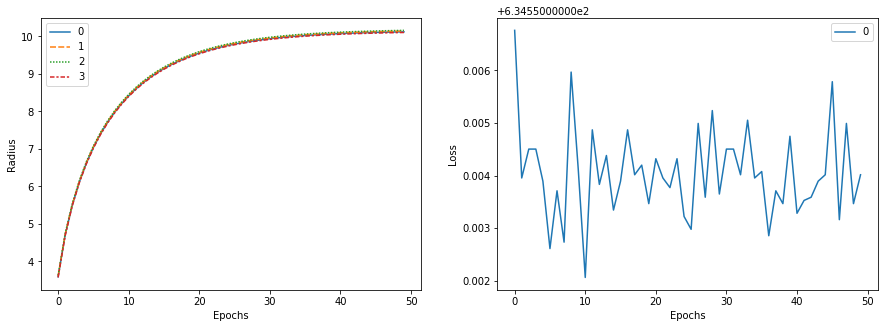

In [5]:
# oset = OpenSet(4, ptmodel) 
oset = osetv2(4, ptmodel)
_, _ = oset.train(train_data, epochs=50, lr_rate = 3)
# print(oset.radius_changes[0], oset.radius_changes[len(oset.radius_changes)-1])
# print(oset.openpredict(oset.features))

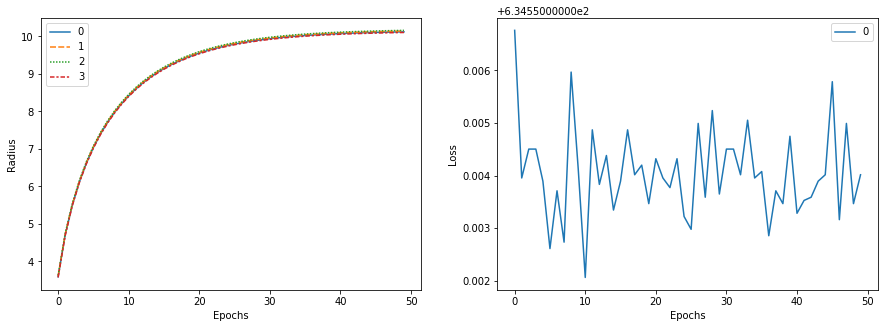

euc_dis: tf.Tensor(
[ 3.4759738  1.7788643  2.4088583  2.1547163  4.274381   2.4479067
 17.503435   1.6152024 11.754558  11.869049   4.6725674  5.3019133
  4.5091105  6.219278   2.1124177 11.40273    2.3184733  1.699329
  5.1930103  2.6264174 12.4081745  4.494795   1.4644169  4.20019
  1.8188025  3.2418845  8.639678  27.076803   3.4445896 13.201704
  3.6578257  6.913686 ], shape=(32,), dtype=float32)
pred_radius: tf.Tensor(
[10.158583 10.158583 10.119296 10.119296 10.101639 10.119296 10.101639
 10.119296 10.1399   10.1399   10.158583 10.101639 10.158583 10.101639
 10.119296 10.1399   10.119296 10.158583 10.158583 10.119296 10.101639
 10.158583 10.158583 10.158583 10.119296 10.119296 10.1399   10.1399
 10.158583 10.101639 10.101639 10.101639], shape=(32,), dtype=float32)
predictions with unknown-9999: [   2    2    0    0    3    0 9999    0 9999 9999    2    3    2    3
    0 9999    0    2    2    0 9999    2    2    2    0    0    1 9999
    2 9999    3    3]


In [6]:
oset.plot_radius_chages()
# print(oset.radius_changes[0], oset.radius_changes[len(oset.radius_changes)-1])
preds = oset.openpredict(oset.features)

In [7]:
oset.evaluate(train_data)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 24.57it/s]

[[800   0   0   0   0]
 [  0 257   0   0 543]
 [  0   0 754   0  46]
 [  0   0   0 666 134]
 [  0   0   0   0   0]]
77.41


(array([[800,   0,   0,   0,   0],
        [  0, 257,   0,   0, 543],
        [  0,   0, 754,   0,  46],
        [  0,   0,   0, 666, 134],
        [  0,   0,   0,   0,   0]], dtype=int64),
 77.41)

In [8]:
#ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].